# Idea:

An implimentation of user segmentation (clustering) on drivers.

A) Examine variable importance (drivers) of cluster membership.

    0. Brand trust & love:
        - Q_Brand_Trust_Drivers. Transparent in its actions 
        - Q_Brand_Trust_Drivers. Ethical 
        - Q_Brand_Trust_Drivers. Respectful 
        - Q_Brand_Trust_Drivers. Honest 
        - Q_BrandxLove.(agree or disagree) [BRAND] is a brand I love

    1. Loyalty metrics: \['qxadvocacy01_1',	'qxadvocacy02_1',	
    'qxretention_1',	'qxenrichment_1']
        - Q_Advocacy01. likely to recommend  [MODEL] or another [BRAND] smartphone
        - Q_Advocacy02. likely to leave a positive online review for [MODEL]
        - Q_Retention.  likely to select [BRAND] the next time (smertphone) 
        - Q_Enrichment. likely to consider [BRAND] products (other electronic product)

    2. Usage variables: \[ 'qxtime',	
    'qxactivitiesxrecency_1 to qxactivitiesxrecency_25',	
    'qxcurrentxos',	'qxcurrentxstorage',	'qxcurrentxcarrier',	
    'qxunlocking',	'qxotherxdevices_1_1 to qxotherxdevices_9_6',	
    'qxpreviousxbrand',	'qxtransition_1',	'qxupgrade01_1 to qxupgrade01_9'\]
    
    3. Driver statements: \[ qxdrivers_1 to qxdrivers_34\]
    
    4. Total Quality Indicators	\[ qxoverallxqualityxindicators_1 to qxoverallxqualityxindicators_4\] : 
        - Q_Overall_Quality_Indicators. [Brand] is trustworthy 
        - Q_Overall_Quality_Indicators. When I use my [MODEL] , I feel good/positive 
        - Q_Overall_Quality_Indicators. My [MODEL]  meets my needs/ performs well 
        - Q_Overall_Quality_Indicators. My [MODEL]  is simple/easy to use 

B) Examine statistical significant differences in demographics amongst segments. 

    1. Demographic Columns \[ 'd1',	'd3_1',	'd3_2',	'd3_3',	'd3_4',	'd4', 'd6',	'd7_1',	'd7_2',	'd7_3',	'd7_4',	'd7_5',	'd7_97',	'd7_99',	'd7_97_other' \]
    -- convert d4[7] to dummy variable

C) Subsequently, we analyse difference between UX_index and UX_Loyalty for the clusters. We'll see a large difference in these two metrics for clusters which relationship between the quality indicators (feeling, trust, simplicity and function) and Loyalty differs. 

This will enable us to make infer things like:
Individuals who feel that ["Uing my [MODEL] doesn't require a lot of effort"] 


# Summary 

#### Total Quality Indicators
#### 3 clusters

### Important Features in Defining Cluster 2:
Variable	Label	imp_rank	imp	coefficient	coef_rank

qxoverallxqualityxindicators_4	simple/easy to use (#1.0, 0.422396)	(#1,-3.192037)

qxoverallxqualityxindicators_3	meets my needs/ performs well (#2.0, 0.256557) (#2,-2.780032)

<br>

### statistically significant differences in demographics between groups 
driven by **Total Quality** are in employment status. If a user is a student, they unlikely to be in cluster 0 and are mor elikley to be in cluster 2 than cluster 1. If they are not currently employed or in school, they are more likely to be in cluster 2 than cluster 0. If they are mployed, ther are more likley to be in cluster 2 han cluster 0.

# Housekeeping

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline 


# Seaborn visualization library
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

import scipy

In [2]:
pd.set_option('display.max_columns', 1000)
pd.options.display.max_rows=1000

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

plt.rcParams.update({'figure.max_open_warning': 0})


In [3]:
import random
random.seed( 0 )

# Load in Data

In [4]:
root = r"../data/input/07 Samsung UX Index - Web App Implementation/"

fname_data = root + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)

fname_vaxmap = root + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Modify d4 column

In [5]:
df_data['d4_X'] = np.where(df_data['d4']==7, '', df_data['d4'])
df_data['d4_7']  = np.where(df_data['d4']==7, df_data['d4'], '')

# Modify d1 column

In [6]:
df_data['d1_1'] = np.where(df_data['d1']==1, '', df_data['d1'])
df_data['d1_2']  = np.where(df_data['d1']==2, df_data['d1'], '')
df_data['d1_3'] = np.where(df_data['d1']==3, '', df_data['d1'])
df_data['d1_4']  = np.where(df_data['d1']==4, df_data['d1'], '')

# Modify Hidage column

In [7]:
df_data['hidagemodels_1'] = np.where(df_data['hidagemodels']==1, '', df_data['hidagemodels'])
df_data['hidagemodels_2']  = np.where(df_data['hidagemodels']==2, df_data['hidagemodels'], '')
df_data['hidagemodels_3'] = np.where(df_data['hidagemodels']==3, '', df_data['hidagemodels'])

# Driver Columns

In [8]:
lst = ['qxoverallxqualityxindicators_'+str(i+1) for i in range(4)]
lst

['qxoverallxqualityxindicators_1',
 'qxoverallxqualityxindicators_2',
 'qxoverallxqualityxindicators_3',
 'qxoverallxqualityxindicators_4']

In [9]:
qx_list = lst
print(len(qx_list))
qx_list


4


['qxoverallxqualityxindicators_1',
 'qxoverallxqualityxindicators_2',
 'qxoverallxqualityxindicators_3',
 'qxoverallxqualityxindicators_4']

In [10]:
df_data_sub = df_data[qx_list]

In [11]:
# list non  integer columns  to be coerced into ints
coerce_cols = df_data_sub.dtypes[df_data_sub.dtypes!='int64'].index.to_list()
df_data_sub[coerce_cols] = df_data_sub[coerce_cols].apply(pd.to_numeric, errors='coerce')

In [12]:
# list all column types
print( np.unique( df_data_sub.columns))
print()
# confirm all are numeric types
print(np.unique(df_data_sub.dtypes.to_frame()[0].to_list()))
print()
print(df_data_sub.shape)
df_data_sub.describe()

['qxoverallxqualityxindicators_1' 'qxoverallxqualityxindicators_2'
 'qxoverallxqualityxindicators_3' 'qxoverallxqualityxindicators_4']

[dtype('int64')]

(3254, 4)


,qxoverallxqualityxindicators_1,qxoverallxqualityxindicators_2,qxoverallxqualityxindicators_3,qxoverallxqualityxindicators_4
count,3254.000000,3254.000000,3254.000000,3254.000000
mean,5.744007,5.775661,5.905040,6.094960
std,1.269394,1.220311,1.207067,1.095453
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,6.000000
50%,6.000000,6.000000,6.000000,6.000000
75%,7.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000


In [13]:
# Count Na values
df_data_sub.isna().sum()[df_data_sub.isna().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [14]:
# drop columns where are values are missing 
# qxactivitiesxdrivers_2_1
cols_allmissing = df_data_sub.isna().sum()[df_data_sub.isna().sum()==3254].index.to_list()
print(cols_allmissing)
print(df_data_sub.shape)
df_data_sub = df_data_sub.drop(cols_allmissing, axis = 1) 
print(df_data_sub.shape)

[]
(3254, 4)
(3254, 4)


In [15]:
# Standardize the qx_list columns
scaler = StandardScaler().fit(df_data_sub)
df_data_sub_std = df_data_sub.copy()
df_data_sub_std[df_data_sub.columns] = scaler.transform(df_data_sub)
df_data_sub_std.describe()

,qxoverallxqualityxindicators_1,qxoverallxqualityxindicators_2,qxoverallxqualityxindicators_3,qxoverallxqualityxindicators_4
count,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03
mean,-1.572190e-16,2.358286e-16,2.183598e-16,-2.445630e-16
std,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00
min,-3.737796e+00,-3.914081e+00,-4.064226e+00,-4.651722e+00
25%,-5.862023e-01,-6.357232e-01,-7.498995e-01,-8.669895e-02
50%,2.016962e-01,1.838661e-01,7.868215e-02,-8.669895e-02
75%,9.895947e-01,1.003455e+00,9.072638e-01,8.263056e-01
max,9.895947e-01,1.003455e+00,9.072638e-01,8.263056e-01


In [16]:
# Count all Na values, now that they're scaled... 
# did scaling generate nans for columns with *some* missing values? NO
df_data_sub_std.isna().sum()[df_data_sub_std.isna().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [17]:
# fill NA's with 0
df_data_sub_std.fillna(0, inplace=True)

In [18]:
# Count Na values... should totall to 0 across the board
sum(df_data_sub_std.isna().sum()[df_data_sub.isna().sum()>0])

0

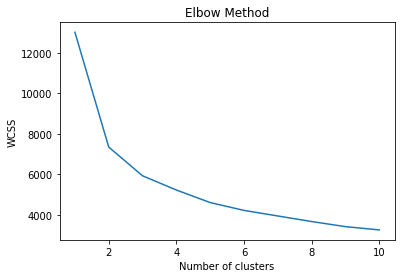

In [19]:
# Using WCSS-based (sum of dists b/w centroids & points for all clusters)...
# ... Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_data_sub_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Fitting KMeans w/ Optimal number of Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_data_sub_std)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


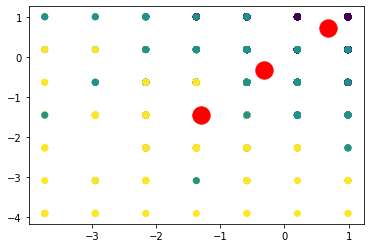

In [21]:
plt.scatter(df_data_sub_std.ix[:,0], df_data_sub_std.ix[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [22]:
df_data_sub_std['pred'] = pred_y
df_data_sub_std.groupby('pred').describe()

qxoverallxqualityxindicators_1                                                                       qxoverallxqualityxindicators_2                                                                       qxoverallxqualityxindicators_3                                                                       qxoverallxqualityxindicators_4                                                                      
                              count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max
pred                                                                                                                                                                                                                                                                                                                                                                                                                    
0                            1497.0  0.672225  0.538998 -1.374101  0.201696  0.989595  0.989595  0.989595                         1497.0  0.726974  0.474127 -1.455313  0.183866  1.003455  1.003455  1.003455                         1497.0  0.677563  0.437959 -1.578481  0.907264  0.907264  0.907264  0.907264                         1497.0  0.627482  0.421607 -1.912708  0.826306  0.826306  0.826306  0.826306
1                            1302.0 -0.316308  0.782497 -3.737796 -0.586202 -0.586202  0.201696  0.989595                         1302.0 -0.332312  0.713346 -3.094491 -0.635723 -0.635723  0.183866  1.003455                         1302.0 -0.244605  0.739322 -4.064226 -0.749899  0.078682  0.078682  0.907264                         1302.0 -0.159627  0.709513 -2.825713 -0.999703 -0.086699 -0.086699  0.826306
2                             455.0 -1.306567  0.983680 -3.737796 -1.374101 -1.374101 -0.586202  0.989595                          455.0 -1.440902  0.910139 -3.914081 -1.455313 -1.455313 -0.635723  1.003455                          455.0 -1.529313  0.969376 -4.064226 -2.407063 -1.578481 -0.749899  0.907264                          455.0 -1.607704  1.085049 -4.651722 -1.912708 -1.912708 -0.999703  0.826306

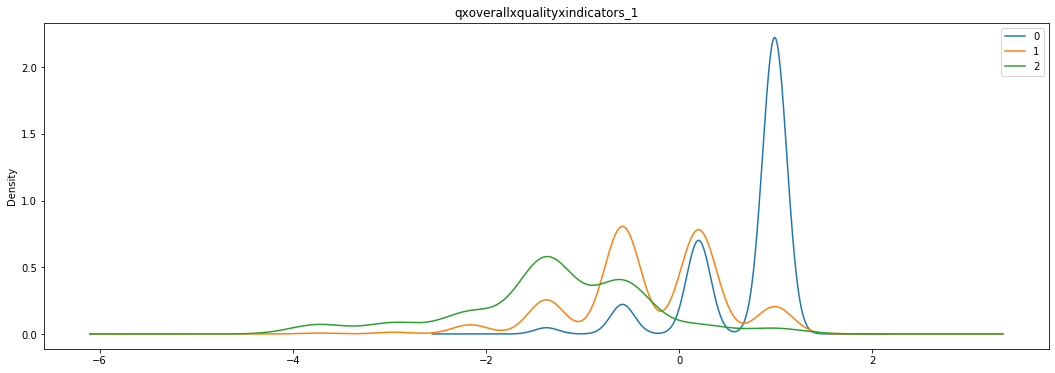

In [23]:
fig, ax = plt.subplots(figsize=(18,6))
  
for name, group in df_data_sub_std.groupby('pred'):
    group[qx_list[0]].plot( kind='kde', ax=ax, title=qx_list[0], label=name, legend=True)

plt.show()

# Save Each Plot to PDF 

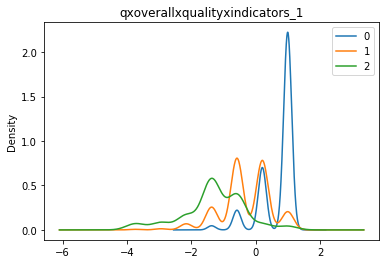

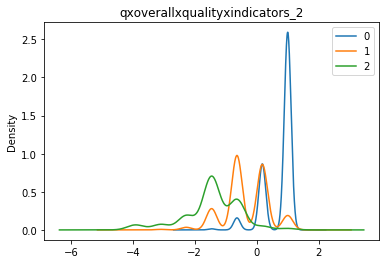

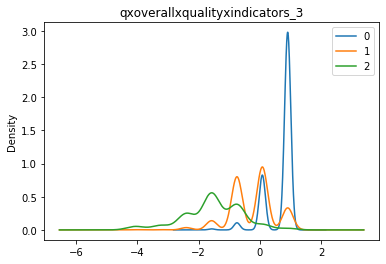

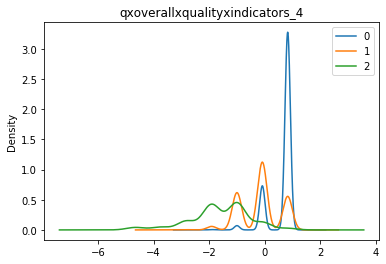

In [24]:
with PdfPages('../data/output/Seg1_KNN3_bytotalqual.pdf') as pdf:
    plt.ioff()
    for col in df_data_sub_std.columns.drop(['pred']):
        plt.figure()
        fig=df_data_sub_std.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
        pdf.savefig(fig)


# Variable Importance - Cluster 2

In [25]:
df_data_sub_std['pred_2'] = np.where(df_data_sub_std['pred']==2, 1, 0)

df_data_sub_std_vars=df_data_sub_std.columns.values.tolist()

y = df_data_sub_std['pred_2']

X = df_data_sub_std
X = X.drop(columns=['pred','pred_2'])

## Logistic Regression

In [26]:
m = LogisticRegression()
m.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# The estimated coefficients will all be around 1:
coefs = pd.DataFrame(list(zip(X.columns, m.coef_[0])))
coefs.columns = ['Variable', 'coefficient']
coefs = coefs.sort_values(['coefficient'], ascending=False)
coefs = coefs.merge(df_varmap[['Variable', 'Label']], on='Variable', how='left')
coefs.head(20)

,Variable,coefficient,Label
0,qxoverallxqualityxindicators_1,-2.260238,Q_Overall_Quality_Indicators. [Brand] is trustworthy - How much do you agree or disagree with the following about your [MODEL]?
1,qxoverallxqualityxindicators_2,-2.398464,"Q_Overall_Quality_Indicators. When I use my [MODEL] , I feel good/positive - How much do you agree or disagree with the following about your [MODEL]?"
2,qxoverallxqualityxindicators_3,-2.780032,Q_Overall_Quality_Indicators. My [MODEL] meets my needs/ performs well - How much do you agree or disagree with the following about your [MODEL]?
3,qxoverallxqualityxindicators_4,-3.192037,Q_Overall_Quality_Indicators. My [MODEL] is simple/easy to use - How much do you agree or disagree with the following about your [MODEL]?


In [28]:
desc_df = df_data_sub_std.groupby('pred').describe()
desc_df = desc_df.unstack().reset_index()
desc_df.columns = ['Variable','Metric','pred','value']
desc_df.head()

,Variable,Metric,pred,value
0,qxoverallxqualityxindicators_1,count,0,1497.000000
1,qxoverallxqualityxindicators_1,count,1,1302.000000
2,qxoverallxqualityxindicators_1,count,2,455.000000
3,qxoverallxqualityxindicators_1,mean,0,0.672225
4,qxoverallxqualityxindicators_1,mean,1,-0.316308


## RFE

In [29]:
# Identifying top 2 variables our of 4
model = LogisticRegression()
rfe_model = RFE(model, 2)
rfe_fit = rfe_model.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(df_data_sub_std.columns[feature_list_index])

qxoverallxqualityxindicators_2
qxoverallxqualityxindicators_4


## Random Forest

In [31]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
 
# Fitting the classifier
rfc.fit(X, y)
 
# Printing the name of each feature along with the gini value
for feature in zip(df_data_sub_std.columns, rfc.feature_importances_):
    print(feature)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('qxoverallxqualityxindicators_1', 0.13499002934806711)
('qxoverallxqualityxindicators_2', 0.1860570104007332)
('qxoverallxqualityxindicators_3', 0.25655669191700387)
('qxoverallxqualityxindicators_4', 0.4223962683341959)


In [32]:
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.15)
sfm.fit(X, y)
 
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(df_data_sub_std.columns[feature_list_index])

qxoverallxqualityxindicators_2
qxoverallxqualityxindicators_3
qxoverallxqualityxindicators_4


## Extra Trees

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
 
# fit an Extra Trees model to the data
etc = ExtraTreesClassifier()
etc.fit(X, y)
 
# Finally selecting the most important features
sfm = SelectFromModel(etc, threshold=0.15)
sfm.fit(X, y)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=10, n_jobs=None,
                                               oob_score=False,
                                               random_state=None, verbose=0,
                                               warm_start=False),
           

In [34]:
varimp = pd.DataFrame({'Variable':df_data_sub_std.columns.drop('pred').drop('pred_2'),
              'imp': list(rfc.feature_importances_)}).sort_values('imp', ascending=False)

varimp = varimp.merge(df_varmap[['Variable', 'Label']], 
                      on='Variable', how='left')


varimp = varimp.merge(coefs[['Variable','coefficient']], on='Variable', how='left')

varimp['imp_rank'] = varimp['imp'].rank(ascending=False)
varimp['coef_rank'] = [abs(x) for x in varimp['coefficient']]
varimp['coef_rank'] = varimp['coef_rank'].rank(ascending=False)

varimp = varimp[['Variable','Label','imp_rank','imp','coefficient','coef_rank']]

varimp[varimp.imp_rank<10].sort_values('coefficient',ascending=True)

,Variable,Label,imp_rank,imp,coefficient,coef_rank
0,qxoverallxqualityxindicators_4,Q_Overall_Quality_Indicators. My [MODEL] is simple/easy to use - How much do you agree or disagree with the following about your [MODEL]?,1.0,0.422396,-3.192037,1.0
1,qxoverallxqualityxindicators_3,Q_Overall_Quality_Indicators. My [MODEL] meets my needs/ performs well - How much do you agree or disagree with the following about your [MODEL]?,2.0,0.256557,-2.780032,2.0
2,qxoverallxqualityxindicators_2,"Q_Overall_Quality_Indicators. When I use my [MODEL] , I feel good/positive - How much do you agree or disagree with the following about your [MODEL]?",3.0,0.186057,-2.398464,3.0
3,qxoverallxqualityxindicators_1,Q_Overall_Quality_Indicators. [Brand] is trustworthy - How much do you agree or disagree with the following about your [MODEL]?,4.0,0.134990,-2.260238,4.0


# Examine statistical significant differences in demographics amongst segments. 

In [37]:
df_data['pred'] = pred_y

In [38]:
# get columns not in df_data_sub_std
att_cols = [ 'd1_1', 'd1_2', 'd1_3', 'd1_4', 
            'd3_1',	'd3_2',	'd3_3',	'd3_4',	'd4_X', 'd4_7', 'd6',
            'd7_1',	'd7_2',	'd7_3',	'd7_4',	'd7_5',	'd7_97',	'd7_99',
            'd7_97_other', 'hidagemodels_1',  'hidagemodels_2',  'hidagemodels_3', ]
att_cols

['d1_1',
 'd1_2',
 'd1_3',
 'd1_4',
 'd3_1',
 'd3_2',
 'd3_3',
 'd3_4',
 'd4_X',
 'd4_7',
 'd6',
 'd7_1',
 'd7_2',
 'd7_3',
 'd7_4',
 'd7_5',
 'd7_97',
 'd7_99',
 'd7_97_other',
 'hidagemodels_1',
 'hidagemodels_2',
 'hidagemodels_3']

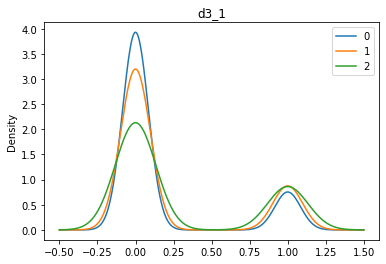

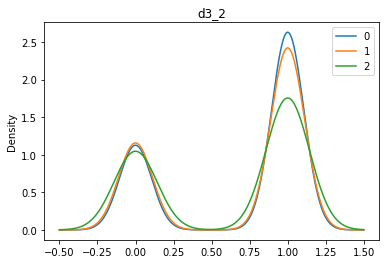

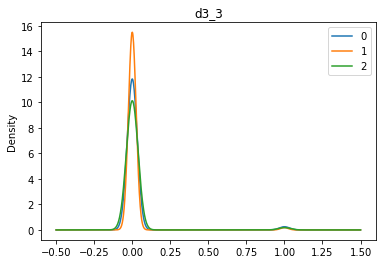

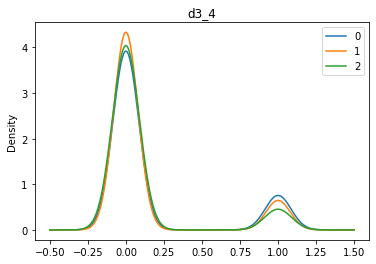

In [41]:
with PdfPages('../data/output/Seg1_KNN3_bytotalqual_demog.pdf') as pdf:
    plt.ioff()
    for col in att_cols:
        if pd.api.types.is_numeric_dtype(df_data[col]):
            plt.figure()
            fig=df_data.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
            pdf.savefig(fig)


In [42]:
# Testing whether the populations have statistically sig diff in means (assuming N distr)
# For two independent samples w/ potentially !=  variance, use Welch's t-test

# scipy.stats.ttest_ind(cat1['values'], cat2['values'], equal_var=False)

t_test_results = {}
for col in att_cols:
    if pd.api.types.is_numeric_dtype(df_data[col]):
        g0 = df_data.where(df_data.pred==0).dropna()[col]
        g1 = df_data.where(df_data.pred==1).dropna()[col]
        g2 = df_data.where(df_data.pred==2).dropna()[col]
        
        t_test_results[col+"_01"] = scipy.stats.ttest_ind(g0,g1, equal_var=False)
        t_test_results[col+"_02"] = scipy.stats.ttest_ind(g0,g2, equal_var=False)
        t_test_results[col+"_12"] = scipy.stats.ttest_ind(g1,g2, equal_var=False)

In [43]:
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df = results_df.sort_values('pvalue', ascending=True)

In [44]:
results_df.head(10)

,statistic,pvalue
d3_1_02,-5.426042,8.214203e-08
d3_4_02,3.719734,2.118732e-04
d3_1_01,-3.496404,4.794346e-04
d3_1_12,-3.103481,1.988061e-03
d3_2_02,2.790992,5.396949e-03
d3_4_01,2.420235,1.557455e-02
d3_2_12,1.916524,5.567646e-02
d3_4_12,1.833136,6.712534e-02
d3_3_01,1.821854,6.858667e-02
d3_2_01,1.222027,2.218040e-01


In [45]:
results_df['Variable_Grp'] = results_df.index
results_df['Variable'] = results_df.Variable_Grp.replace("_01|_02|_12","", regex=True)
results_df_p01 = results_df[results_df.pvalue<=.01].merge(df_varmap[['Variable', 'Label']], 
                                         on='Variable', how='left')
results_df_p01

,statistic,pvalue,Variable_Grp,Variable,Label
0,-5.426042,8.214203e-08,d3_1_02,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?
1,3.719734,2.118732e-04,d3_4_02,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?
2,-3.496404,4.794346e-04,d3_1_01,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?
3,-3.103481,1.988061e-03,d3_1_12,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?
4,2.790992,5.396949e-03,d3_2_02,d3_2,D3. Employed - Which of the following best describes your current employment status?


In [48]:
# for our null Hypothesis: P1>=P2 (one tailed test) , use pvalue/2
results_df_p01['pvalue_1t'] = results_df_p01['pvalue']/2
results_df_p01
# reject if p/2 < alpha (.01)

,statistic,pvalue,Variable_Grp,Variable,Label,pvalue_1t
0,-5.426042,8.214203e-08,d3_1_02,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?,4.107102e-08
1,3.719734,2.118732e-04,d3_4_02,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?,1.059366e-04
2,-3.496404,4.794346e-04,d3_1_01,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?,2.397173e-04
3,-3.103481,1.988061e-03,d3_1_12,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?,9.940305e-04
4,2.790992,5.396949e-03,d3_2_02,d3_2,D3. Employed - Which of the following best describes your current employment status?,2.698474e-03


In [49]:
results_df_p01.to_csv('../data/output/Seg1_KNN3_bytotalqual_demog_statsig.csv', index=False)

### In summary,

If a user is a student, they unlikely to be in cluster 0 and are mor elikley to be in cluster 2 than cluster 1. If they are not currently employed or in school, they are more likely to be in cluster 2 than cluster 0. If they are mployed, ther are more likley to be in cluster 2 han cluster 0.